# Tree-Based Classification Techniques
In this section, I will use three tree-based classifiers: the decision tree, the random forest, and the ensemble learning classifier. Each classifier will be testing three datasets:
1. Regular Dataset - The non-normalized dataset
2. Normalized Dataset - The normalized dataset
3. PCA Dataset - The normalized dataset with features reduced through using PCA

Through using these datasets, I will explore the effects of normalization and feature reduction on tree classifiers.

## Decision Tree Classifier
A decision tree, specifically a classification decision tree, is a model which makes observations about an input feature, and makes decisions at various nodes based on those input features. The classification tree is better for making classifications about discrete variables, such as True or False, while the regression tree is better for continuous variables.

Decision trees are good for small datasets; however, they are also prone to overfitting and changing the datasets a little can change the outcome of a decision tree greatly.

In [1]:
# dataframes
import pandas as pd
from io import StringIO
import numpy as np

#get datasets
x_reg = pd.read_csv('VSA_new_total.csv')
x_norm = pd.read_csv('VSA_new_norm.csv')
x_re = pd.read_csv('VSA_norm_reduced.csv')

# get labels
y = pd.read_csv('VSA_labels.csv')
        
# get the features
features = ['ActualLengthOfPlan',
            'NumberOfQtrWithoutCourses',
            'NumberOfQtrWithCourses',
            'TotalNumberOfCourses',
            'AvgNumberOfCoursesPerQuarter',
            'TotalNumberOfYears',
            'NumberofYearswithCOurse',
            'GapDelta']
features_re = ['NumberOfQtrWithoutCourses',
            'GapDelta']

### Splitting the dataset
I have chosen to split the dataset into 70% training, and 30% testing. There is no need for a validation set in Decision Tree classification.

In [2]:
# Split the data into train and test sets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# order of the keys:  x_train, x_test, y_train, y_test
xy_dict = {}
xy_dict['Regular Dataset'] = train_test_split(x_reg, y, test_size=0.3)
xy_dict['Normalized Dataset'] = train_test_split(x_norm, y, test_size=0.3)
xy_dict['PCA Reduced Dataset'] = train_test_split(x_re, y, test_size=0.3)

In [6]:
# Test the different datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


# Takes in a pandas dataframe as x, corresponding target values as y,
# and a dataframe of labels

def tree_classifier(x, y, x_test, y_test, label_names):
    dtree=DecisionTreeClassifier() 
    dtree = dtree.fit(x, y)
    dot_data = StringIO()
    export_graphviz(dtree, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names = label_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    tree = graph.create_png()
    return dtree.score(x_test, y_test), tree 
    

# Try un-normalized dataset
print("Score for the Non-Normalized Dataset")
x, x_test, y, y_test = xy_dict['Regular Dataset']
score_reg, graph_reg = tree_classifier(x, y.astype(str), x_test, y_test.astype(str), features)
print(score_reg)


# Try un-normalized dataset
print("Score for the Normalized Dataset")
x, x_test, y, y_test = xy_dict['Normalized Dataset']
score_norm, graph_norm = tree_classifier(x, y.astype(str), x_test, y_test.astype(str), features)
print(score_norm)

# Try Reduced-Normalized dataset
x, y, x_test, y_test = xy_dict['PCA Reduced Dataset']
print("Score for the Reduced Normalized Dataset")
x, x_test, y, y_test = xy_dict['PCA Reduced Dataset']
score_re, graph_re = tree_classifier(x, y.astype(str), x_test, y_test.astype(str), features_re)
print(score_re)

Score for the Non-Normalized Dataset
1.0
Score for the Normalized Dataset
1.0
Score for the Reduced Normalized Dataset
0.783673469388


Tree for the Non-Normalized Dataset


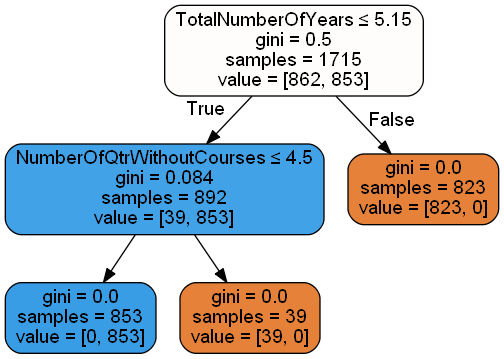

In [7]:
print("Tree for the Non-Normalized Dataset")
Image(graph_reg)

Tree for the Normalized Dataset


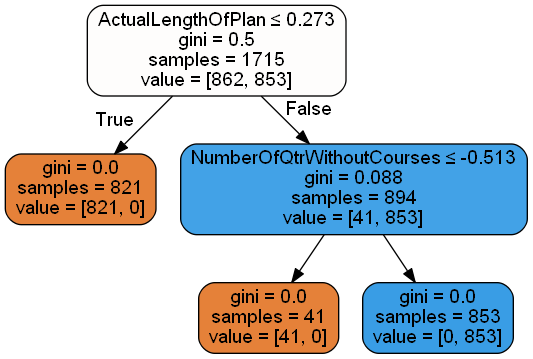

In [8]:
print("Tree for the Normalized Dataset")
Image(graph_norm)

Tree for the Reduced Normalized Dataset


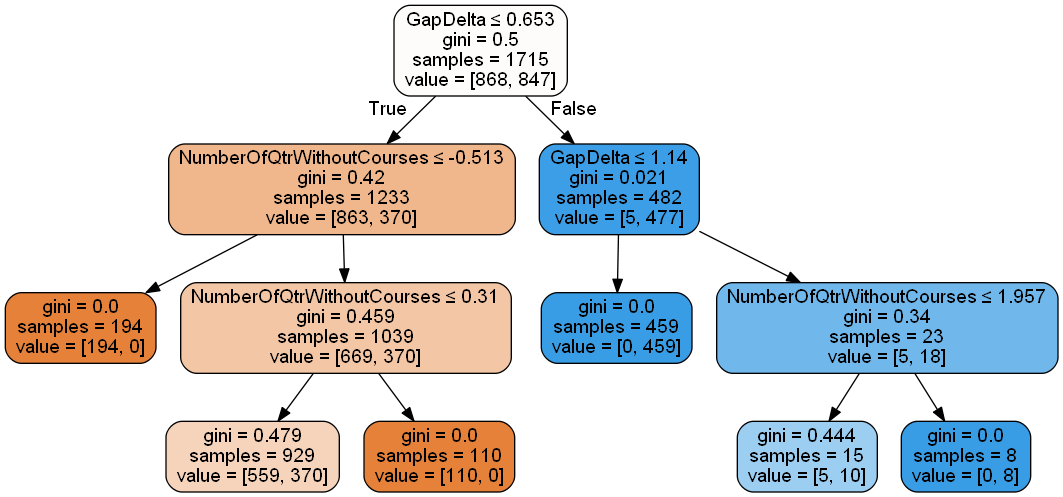

In [10]:
print("Tree for the Reduced Normalized Dataset")
Image(graph_re)

### Decision Tree Results
The non-normalized and normalized datasets had the same accuracy, at 1.0, meaning that they were able to completely correctly classify all the datapoints. This shows that for a Decision Tree, normalization is not as important as it is in other classifiers, such as the Neural Network classifier.

On the other hand, the reduced dataset with the features that contribute the most to the variance in the data, had only around 80% accuracy, meaning that Decision Trees do not necessarily rely the variance in the data.

This also means that the true reduced dataset should contain only the TotalNumberOfYears and the GapDelta features.

Running through the test several times, according to the graphs for the Regular Dataset and Normalized Dataset, the TotalNumberOfYears, NumberOfQtrWithoutCourses, and GapDelta features tend to be the most important. However, depending on the randomized selection of X and Y for training data, this changes. For example currently for the Normalized dataset the most important feature is TotalNumberOfYears, if you resample the testing and training sets, this will be different.

## Random Forest Classifier
A random forest is a type of classifier that makes a bunch of decision trees, and based upon the score of each decision tree, determines the outcome. The results of all the trees are considered during classification.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Takes in a dataset and its targets and fits it to a random forest
# Returns the score and most important features for the classifier
def rf_classifier(X, y, x_test, y_test):
    rfc = RandomForestClassifier()
    rfc.fit(X, y.values.ravel())
    
    return rfc.feature_importances_, rfc.score(x_test, y_test)

# Non-normalized Dataset
x, x_test, y, y_test = xy_dict['Regular Dataset']
reg_feat_imp, reg_score = rf_classifier(x, y, x_test, y_test)
print('Feature importances for the Non-Normalized Dataset:')
print(reg_feat_imp)
print('Score for the Non-Normalized Dataset:')
print(reg_score,'\n')

# Normalized Dataset
x, x_test, y, y_test = xy_dict['Normalized Dataset']
norm_feat_imp, norm_score = rf_classifier(x, y, x_test, y_test)
print('Feature importances for the Normalized Dataset:')
print(norm_feat_imp)
print('Score for the Normalized Dataset:')
print(norm_score,'\n')

# PCA Reduced Feature Dataset
x, x_test, y, y_test = xy_dict['PCA Reduced Dataset']
re_feat_imp, re_score = rf_classifier(x, y, x_test, y_test)
print('Feature importances for the PCA Reduced Feature Dataset:')
print(re_feat_imp)
print('Score for the PCA-Reduced Feature Dataset:')
print(re_score,'\n')

Feature importances for the Non-Normalized Dataset:
[ 0.00421654  0.06743794  0.39551827  0.02950539  0.03314321  0.3302399
  0.0997295   0.04020924]
Score for the Non-Normalized Dataset:
1.0 

Feature importances for the Normalized Dataset:
[ 0.37900462  0.04527704  0.00067833  0.00129065  0.03041792  0.29591378
  0.13636443  0.11105323]
Score for the Normalized Dataset:
1.0 

Feature importances for the PCA Reduced Feature Dataset:
[ 0.20965061  0.79034939]
Score for the PCA-Reduced Feature Dataset:
0.783673469388 



### Random Forest Results
The random forest has the same classification accuracies as the tree classifier. This makes sense because the base model is a decision tree. Meanwhile, the Tree-Reduced Feature dataset has just as much accuracy as the other datasets, meaning Feature Reduction for a tree does not depend on normalization at all.

## The Bagged Classifier
A bagging classifier that uses a base classifier on random subsets of the original dataset, and then aggregates the individual predictions for a final prediction. Meanwhile, an ensemble technique uses multiple learning algorithms, and chooses the best base.

In [12]:
from sklearn.ensemble import BaggingClassifier

# Takes in a dataset and its targets and fits it to a random forest
# Returns the score
def bagging_classifier(x, y, x_test, y_test):
    bag = BaggingClassifier()
    bag.fit(x, y.values.ravel())
    
    return bag.score(x_test, y_test)

# Non-normalized Dataset
x, x_test, y, y_test = xy_dict['Regular Dataset']
reg_score = bagging_classifier(x, y, x_test, y_test)
print('Score for the Non-Normalized Dataset:')
print(reg_score,'\n')

# Normalized Dataset
x, x_test, y, y_test = xy_dict['Normalized Dataset']
norm_score = bagging_classifier(x, y, x_test, y_test)
print('Score for the Normalized Dataset:')
print(norm_score,'\n')

# PCA Reduced Feature Dataset
x, x_test, y, y_test = xy_dict['PCA Reduced Dataset']
re_score = bagging_classifier(x, y, x_test, y_test)
print('Score for the PCA-Reduced Feature Dataset:')
print(re_score,'\n')

Score for the Non-Normalized Dataset:
1.0 

Score for the Normalized Dataset:
1.0 

Score for the PCA-Reduced Feature Dataset:
0.783673469388 



### Results of the Bagging Classifier
Again, since the base class is a Tree, the accuracies are going to be similar to the Decision Tree Classsifier.

## Conclusion
Since all are run on Decision Tree Classification techniques, and because of the nature of the data, the base Decision Tree class should be sufficient. There are a limited amount of features, and so Trees should be a low computation method of training the data.

A tree is extremely sensitive to its inputs, so having a larger set of inputs is better, though if you have a small dataset, trees are an excellent type of classifier.

Normalization does not help in accuracy at all, so do not normalize the data. Feature Reduction should be based not on PCA, but rather on observing which features are the most important when it comes to trees.